In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df  = pd.read_csv('game_sales_data.csv', encoding='ISO-8859-1')
df.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017



## 1. Remove rows where the platform is not PC, PS4, PS3, Xone, X360


In [124]:
platforms = ['PC', 'PS4', 'PS3', 'Xone', 'X360']
df1 = df.loc[df['Platform'].isin(platforms)]
df1.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
5,6,Minecraft,PC,Mojang,Mojang AB,10.0,7.8,33.15,2010
11,12,Call of Duty: Modern Warfare,PS4,Activision,Infinity Ward,8.0,3.3,30.13,2019
15,16,Kinect Adventures!,X360,Microsoft Game Studios,Good Science Studio,6.7,NaN,24.00,2010


##  Count the number of distinct games

In [24]:
number_of_distinct_games = len(pd.unique(df1['Name']))
print('Number of distinct games:', number_of_distinct_games)

Number of distinct games: 3866


## 2. How many games with unknown publishers are there ?


In [125]:
count_of_unknown_publisher_games = len(df[df['Publisher'] == "Unknown"])
print('Number of games with unknown publishers:', count_of_unknown_publisher_games)

Number of games with unknown publishers: 156


## 3. Visualize average critic score per developer in a scatter plot. (Include marker size depending on the value)

In [147]:
critic_score_df = df1.groupby('Developer').agg(Count=('Critic_Score', 'size'), Avg_Critic_Score=('Critic_Score', 'mean')) \
                   .reset_index().dropna()

critic_score_df.head(10)

,Developer,Count,Avg_Critic_Score
0,11 bit studios,3,8.150000
2,1C Company,1,7.200000
3,1C Maddox Games,1,8.300000
4,1C: Maddox Games,3,6.550000
5,1C:Ino-Co,3,7.700000
6,2D Boy,1,9.000000
7,2K Australia / 2K Boston,2,9.600000
8,2K Boston / 2K Australia / 2K Marin,1,9.300000
9,2K Czech,2,8.200000
10,2K Marin,6,7.016667


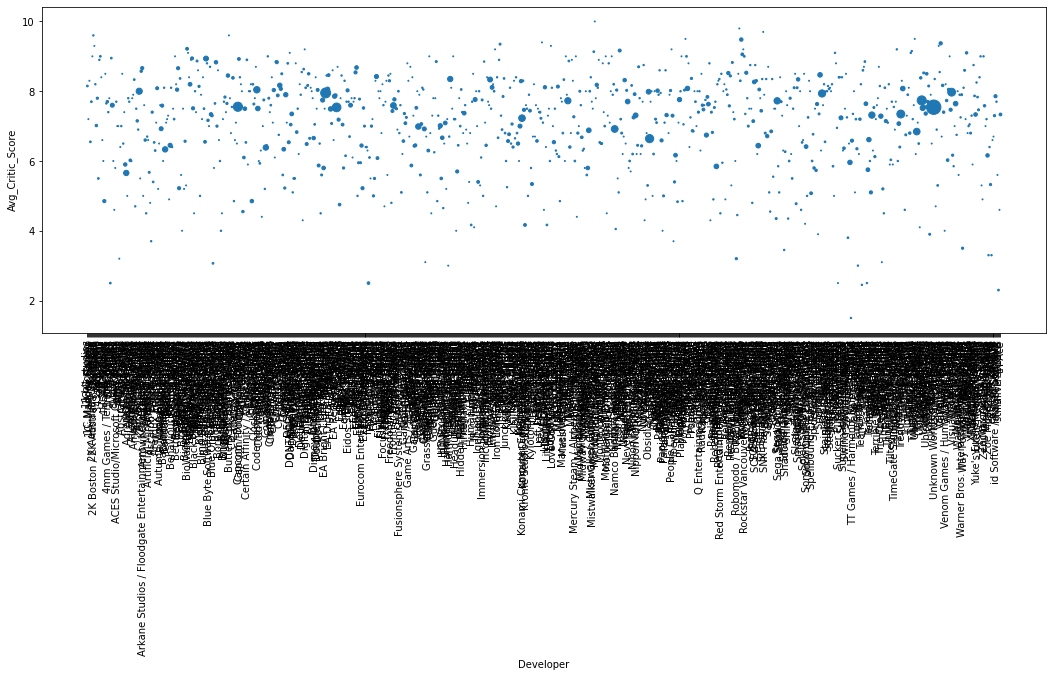

In [149]:
critic_score.plot.scatter(x = 'Developer', y = 'Avg_Critic_Score', s = 'Count', figsize=(18,6) );
plt.xticks(rotation=90)
plt.show()

### Another Scatter Plot showing top 100 developers

I felt the above scatter plot is too messy to extract any information. Here I have created another scatter plot showing the top 100 developers based on score. The score was calculated by multiplying the normalized values of Count and Average Critic Score.

In [99]:
# Normalizing Count Values
min_count = critic_score['Count'].min()
max_count = critic_score['Count'].max()
critic_score['Normalized_Count'] = critic_score['Count'] / (max_count -min_count )

# Normalizing Average Critic Score Values
min_critic_score = critic_score['Avg_Critic_Score'].min()
max_critic_score = critic_score['Avg_Critic_Score'].max()
critic_score['Normalized_Avg_Critic_Score'] = critic_score['Avg_Critic_Score'] / (max_critic_score -min_critic_score )

In [132]:
#Calculation the score by multiplying Normalized_Avg_Critic_Score and Normalized_Count
critic_score['Developer_Score'] = critic_score['Normalized_Avg_Critic_Score'] * critic_score['Normalized_Count']

In [155]:
# Top 50 developed Based on Developer_Score
top_100_developer = critic_score.nlargest(100,'Developer_Score')
top_100_developer.head(10)

,Developer,Count,Avg_Critic_Score,Normalized_Count,Developer_Score,Normalized_Avg_Critic_Score
1333,Unknown,207,7.542029,1.004854,0.891605,0.887298
374,EA Canada,99,7.950602,0.480583,0.449520,0.935365
234,Capcom,84,7.555102,0.407767,0.362438,0.888836
1320,Ubisoft Montreal,82,7.737313,0.398058,0.362341,0.910272
387,EA Tiburon,76,7.537143,0.368932,0.327140,0.886723
1359,Visual Concepts,62,7.972917,0.300971,0.282308,0.937990
1288,Traveller's Tales,63,7.346512,0.305825,0.264323,0.864295
913,Omega Force,67,6.641026,0.325243,0.254111,0.781297
1169,Square Enix,52,7.936000,0.252427,0.235678,0.933647
268,Codemasters,41,8.041935,0.199029,0.188303,0.946110


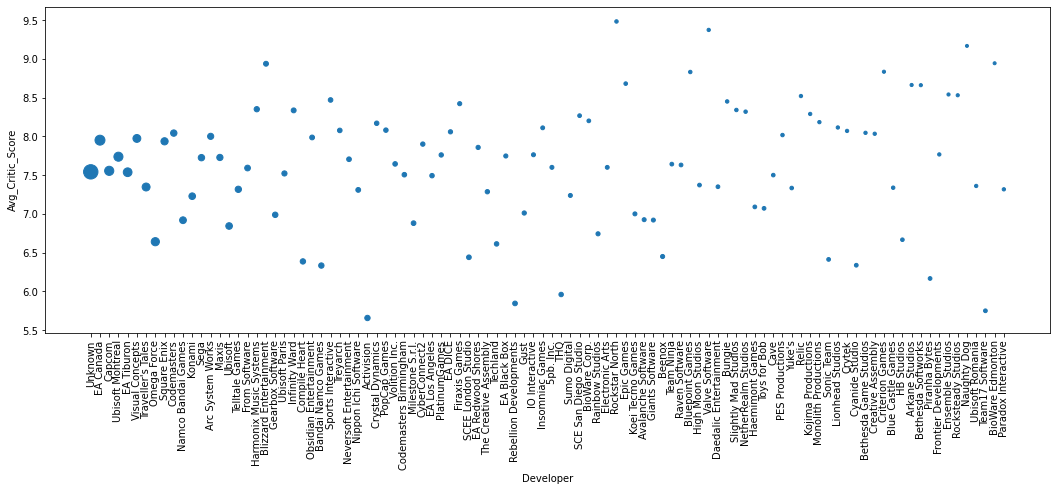

In [156]:

top_100_developer.plot.scatter(x = 'Developer', y = 'Avg_Critic_Score', s = 'Count', figsize=(18,6) )
plt.xticks(rotation=90)
plt.show()

## 4. Show the top 5 games with biggest differences in critic vs user score.

In [157]:
df2 = df1.dropna(subset=['Critic_Score', 'User_Score'])
df2['Score_Difference'] =  pd.Series.abs(df2['Critic_Score'] - df2['User_Score'])

top_5_games_df = df2.nlargest(5,'Score_Difference')
top_5_games_df

c:\python\python396\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year,Score_Difference
157,158,FIFA 20,PS4,Electronic Arts,EA Sports,7.9,1.1,7.15,2019,6.8
3506,3505,Call of Duty: Ghosts,PC,Activision,Infinity Ward,8.8,2.1,0.67,2013,6.7
116,117,FIFA 19,PS4,Electronic Arts,EA Sports,8.3,1.7,9.15,2018,6.6
135,136,NBA 2K20,PS4,2K Sports,Visual Concepts,7.8,1.2,8.00,2019,6.6
506,505,NBA 2K18,PS4,2K Sports,Visual Concepts,8.1,1.7,3.34,2017,6.4


In [158]:
print("Top  games are-")
print(*top_5_games_df.Name.values,  sep=", ")

Top  games are-
FIFA 20, Call of Duty: Ghosts, FIFA 19, NBA 2K20, NBA 2K18
